# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the analyst to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for stakeholders to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.





## 1.  Data ETL

### 1.1 Data Loading

In [405]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib
import json
from io import StringIO


 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



In [406]:
# Your code
from zipfile import ZipFile
file_list = []
zip_obj = ZipFile('D:\Rashika\Modern data science/HTWebLog_p1.zip', 'r')
files = zip_obj.namelist()
print("Number of files in the zip: {}".format(len(files)))
columns = zip_obj.read(files[0]).decode('utf8', 'ignore').split('#Fields: ')[1].split('\n')[0].split(' ')
df_ht = pd.DataFrame(columns= columns)
for file_index, file in enumerate(files):
#     if file_index == 5:
#         break
    json_log = {}
    log_file = zip_obj.read(file).decode('utf8', 'ignore')
    log_data = log_file.split("#Fields: ")[1]
    df_file = pd.read_csv(StringIO(log_data), ' ')
    df_ht = pd.concat([df_ht, df_file])
    print("Loaded file number {}".format(file_index))  

Number of files in the zip: 120
Loaded file number 0
Loaded file number 1
Loaded file number 2
Loaded file number 3
Loaded file number 4
Loaded file number 5
Loaded file number 6
Loaded file number 7
Loaded file number 8
Loaded file number 9
Loaded file number 10
Loaded file number 11
Loaded file number 12
Loaded file number 13
Loaded file number 14
Loaded file number 15
Loaded file number 16
Loaded file number 17
Loaded file number 18
Loaded file number 19
Loaded file number 20
Loaded file number 21
Loaded file number 22
Loaded file number 23
Loaded file number 24
Loaded file number 25
Loaded file number 26
Loaded file number 27
Loaded file number 28
Loaded file number 29
Loaded file number 30
Loaded file number 31
Loaded file number 32
Loaded file number 33
Loaded file number 34
Loaded file number 35
Loaded file number 36
Loaded file number 37
Loaded file number 38
Loaded file number 39
Loaded file number 40
Loaded file number 41
Loaded file number 42
Loaded file number 43
Loaded fil

 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


In [408]:
# Your code
df_ht.head(5)


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,\r,Unnamed: 15
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0,NaN,NaN
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0,NaN,NaN
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,NaN,NaN
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,NaN,NaN
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,NaN,NaN


In [410]:
total_rows=len(df_ht.axes[0])
total_cols=len(df_ht.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

Number of Rows: 8276273
Number of Columns: 17


### 1.2 Data Cleaning

#### Remove all NAs from data

In [411]:
# Your code
nan_values = df_ht.isna().any() #Check which columns have NAs

print (nan_values)

date               False
time               False
s-sitename          True
s-ip                True
cs-method           True
cs-uri-stem         True
cs-uri-query        True
s-port              True
cs-username         True
c-ip                True
cs(User-Agent)      True
cs(Referer)         True
sc-status           True
sc-substatus        True
sc-win32-status     True
\r                  True
Unnamed: 15         True
dtype: bool


In [412]:
df_na_sum = df_ht.isnull().sum() #For each of those columns, display the number of NA records
df_na_sum[df_na_sum != 0]

s-sitename              11
s-ip                    22
cs-method               22
cs-uri-stem             22
cs-uri-query            33
s-port                  33
cs-username             33
c-ip                    33
cs(User-Agent)          35
cs(Referer)             33
sc-status               33
sc-substatus            33
sc-win32-status         33
\r                 8276273
Unnamed: 15        8276273
dtype: int64

In [413]:
df_ht = df_ht.drop(columns=['\r', 'Unnamed: 15'])
print(df_ht.head())

         date      time s-sitename       s-ip cs-method  \
0  2006-11-01  00:00:08     W3SVC1  127.0.0.1       GET   
1  2006-11-01  00:00:08     W3SVC1  127.0.0.1       GET   
2  2006-11-01  00:00:08     W3SVC1  127.0.0.1       GET   
3  2006-11-01  00:00:09     W3SVC1  127.0.0.1       GET   
4  2006-11-01  00:00:09     W3SVC1  127.0.0.1       GET   

                              cs-uri-stem cs-uri-query  s-port cs-username  \
0                           /Default.aspx            -    80.0           -   
1       /Tulip/home/en-us/home_index.aspx            -    80.0           -   
2        /Tulip/includes/js/CommonUtil.js            -    80.0           -   
3         /Tulip/common/common_style.aspx   lang=en-us    80.0           -   
4  /Tulip/common/en-us/images/top_img.jpg            -    80.0           -   

          c-ip                                     cs(User-Agent)  \
0  70.80.84.76  Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...   
1  70.80.84.76  Mozilla/4.0+(compatibl

In [414]:
df_ht.dropna(inplace=True)
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


In [427]:
df_ht.dropna(how='any').shape

(8276238, 17)

## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot 



In [415]:
# Create a bar chart of the number of server requests by hour of the day
# Your code
df_ht['Hours'] = pd.to_datetime(df_ht['time'], errors='coerce').dt.hour
df_ht = df_ht.dropna(subset=['Hours'])
df_ht["Hours"] = df_ht["Hours"].astype(int)
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,Hours
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0,0
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0,0
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,0
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,0
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,0



<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [416]:
hours_num= (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
hours_intervals= ('0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15',
               '15-16','16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-0')
df_ht['Hours_interval']= df_ht['Hours']
df_ht['Hours_interval'] = df_ht["Hours_interval"].replace(hours_num,hours_intervals)
df_ht.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,Hours,Hours_interval
0,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Default.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.google.com/search?sourceid=navclien...,200.0,0.0,0.0,0,0-1
1,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0,0,0-1
2,2006-11-01,00:00:08,W3SVC1,127.0.0.1,GET,/Tulip/includes/js/CommonUtil.js,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,0,0-1
3,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,0,0-1
4,2006-11-01,00:00:09,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/top_img.jpg,-,80.0,-,70.80.84.76,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,0,0-1


Text(0, 0.5, 'Frequency')

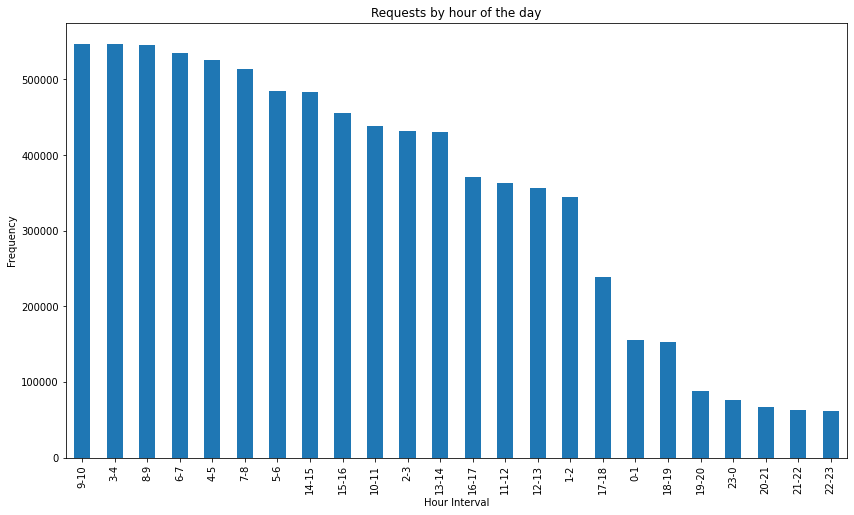

In [417]:
value_counts = df_ht['Hours_interval'].value_counts()
ax = value_counts.plot(kind='bar',
                                    figsize=(14,8),
                                    title="Requests by hour of the day")
ax.set_xlabel("Hour Interval")
ax.set_ylabel("Frequency")
# print(value_counts)

In [418]:
request_per_hour= df_ht.groupby(['Hours']).size().reset_index(name="Request per hour")
print(request_per_hour)

    Hours  Request per hour
0       0            155981
1       1            344430
2       2            432358
3       3            546752
4       4            526279
5       5            484511
6       6            535538
7       7            514160
8       8            545271
9       9            547556
10     10            438059
11     11            362903
12     12            356259
13     13            430570
14     14            482904
15     15            455068
16     16            370523
17     17            239191
18     18            152490
19     19             87630
20     20             67151
21     21             62567
22     22             61559
23     23             76528


In [419]:
request_per_hour= request_per_hour[(request_per_hour['Request per hour']>=400000)&(request_per_hour['Request per hour']<=490000)]
print(request_per_hour)

    Hours  Request per hour
2       2            432358
5       5            484511
10     10            438059
13     13            430570
14     14            482904
15     15            455068


### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

#### Server Status

Number of unique values in column "sc-status" of the dataframe : 
12
Unique elements in column "sc-status" 
[200. 304. 206. 404. 301. 302. 500. 501. 400. 403. 406. 416.]
    sc-status    count
0       416.0        3
1       406.0       54
2       501.0      109
3       400.0      210
4       301.0      420
5       403.0      692
6       500.0     1947
7       302.0     7211
8       206.0    71097
9       404.0   140874
10      304.0  2093020
11      200.0  5960601


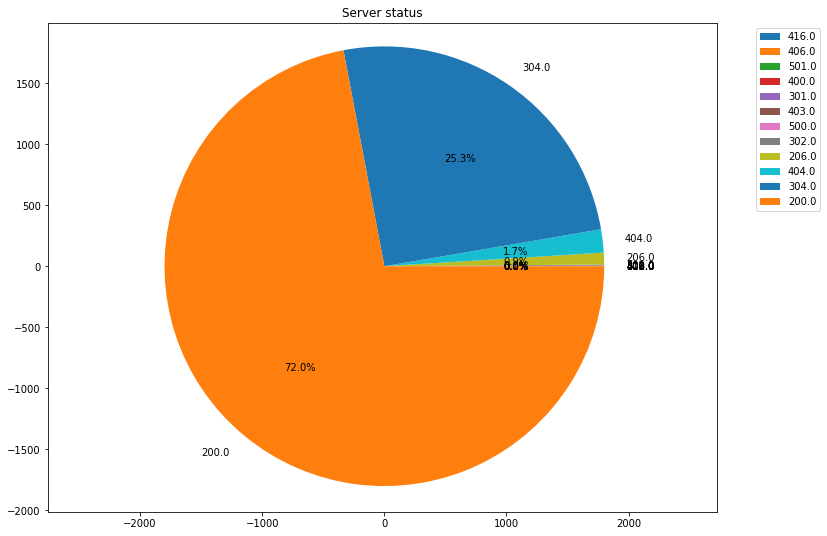

In [420]:
#plt.title("Server Status")

#Your code
uniqueValues = df_ht['sc-status'].nunique()
print('Number of unique values in column "sc-status" of the dataframe : ')
print(uniqueValues)
uniqueValues = df_ht['sc-status'].unique()
print('Unique elements in column "sc-status" ')
print(uniqueValues)
uni_val =df_ht.groupby('sc-status').size().sort_values().reset_index(name='count')
print (uni_val)
uni_val.head(12)
fig= plt.figure(figsize=(12,9))
plt.pie(uni_val['count'],labels=uni_val['sc-status'],autopct='%1.1f%%',radius=1800, frame=True)
plt.title("Server status")
plt.legend(labels=uni_val['sc-status'],loc="upper left",bbox_to_anchor=(1.05,1.0))
plt.axis('equal')
plt.show()


### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [421]:
#Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59.
request_1= df_ht
requests= (request_1['date']=='2007-01-01') & (request_1['time']>="20:00:00") & (request_1['time']<= "20:59:59")
request_1=request_1.loc[requests]
request_1= pd.DataFrame(request_1)
request_1.head()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,Hours,Hours_interval
28823,2007-01-01,20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,-,80.0,-,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200.0,0.0,0.0,20,20-21
28824,2007-01-01,20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,lang=en-us,80.0,-,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0,20,20-21
28825,2007-01-01,20:01:12,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/HarbourViewRoom02.jpg,-,80.0,-,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,-,200.0,0.0,0.0,20,20-21
28826,2007-01-01,20:01:48,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SkyLounge01.jpg,-,80.0,-,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,-,200.0,0.0,0.0,20,20-21
28827,2007-01-01,20:01:57,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SuperiorRoom01.jpg,-,80.0,-,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,-,200.0,0.0,0.0,20,20-21


In [422]:
try:
    from ip2geotools.databases.noncommercial import DbIpCity
except:
    !pip install ip2geotools
    from ip2geotools.databases.noncommercial import DbIpCity
#Your code
country_response= []
city_response=[]
for index, row in request_1.iterrows():
    abc=DbIpCity.get(row['c-ip'],api_key='free')
    country_response.append(abc.country)
    city_response.append(abc.city)
print (country_response)
print(city_response)

2021-04-17 20:42:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:42:18 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/210.184.71.81 HTTP/1.1" 200 None
2021-04-17 20:42:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:42:19 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Hong+Kong%2C+Central+and+Western+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:42:19 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Hong+Kong%2C+Central+and+Western+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:42:19 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:42:20 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/210.184.71.81 HTTP/1.1" 200 None
2021-04-17 20:42:20 [urllib3.connectionpool] DEBUG: Star

2021-04-17 20:42:36 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Jinrongjie+%28Xicheng+District%29%2C+CN&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:42:36 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Jinrongjie+%28Xicheng+District%29%2C+CN&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:42:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:42:36 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.108.23.56 HTTP/1.1" 200 None
2021-04-17 20:42:36 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:42:37 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Jinrongjie+%28Xicheng+District%29%2C+Beijing+CN&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:42:37 [geocoder.base] INFO: Requested https://n

2021-04-17 20:42:48 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:42:51 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Jinrongjie+%28Xicheng+District%29%2C+CN&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:42:51 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Jinrongjie+%28Xicheng+District%29%2C+CN&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:42:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:42:52 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.108.23.56 HTTP/1.1" 200 None
2021-04-17 20:42:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:42:53 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Jinrongjie+%28Xicheng+District%29%2C+Beijing+CN&

2021-04-17 20:43:14 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=New+York%2C+New+York+US&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:43:14 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=New+York%2C+New+York+US&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:43:14 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:43:14 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/220.181.18.7 HTTP/1.1" 200 None
2021-04-17 20:43:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:43:15 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Beijing%2C+Beijing+CN&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:43:15 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Beijing%2C+Beijing+CN&f

2021-04-17 20:43:30 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:43:31 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:43:31 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:43:31 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:43:32 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:43:32 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:43:32 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limi

2021-04-17 20:43:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:43:44 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:43:44 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:43:45 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:43:45 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:43:45 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:43:46 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:43:46 [urllib3.connectionpool] DEBUG: Starting new H

2021-04-17 20:43:59 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:43:59 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:43:59 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:43:59 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:44:00 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:44:00 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:44:00 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:44:00 [u

2021-04-17 20:44:13 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:44:13 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:44:13 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:44:14 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:44:14 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:44:15 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:44:15 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q

2021-04-17 20:44:26 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:44:26 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:44:26 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:44:27 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:44:27 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:44:27 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:44:27 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:44:27 [urllib3.connectionpool] DEBUG

2021-04-17 20:44:38 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:44:38 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:44:39 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:44:39 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:44:39 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:44:39 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:44:39 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:44:40 [u

2021-04-17 20:44:51 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:44:51 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:44:51 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:44:52 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:44:52 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:44:52 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:44:52 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q

2021-04-17 20:45:04 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:45:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:45:05 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:45:05 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:45:05 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:45:05 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:45:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:45:06 [urllib3.connectionpool] DEBUG

2021-04-17 20:45:17 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:45:17 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:45:18 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:45:18 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:45:18 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:45:18 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:45:18 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:45:19 [u

2021-04-17 20:45:30 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:45:30 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:45:30 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:45:30 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:45:30 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:45:31 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:45:31 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q

2021-04-17 20:45:44 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:45:44 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:45:44 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:45:44 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:45:44 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:45:45 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:45:45 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:45:46 [urllib3.connectionpool] DEBUG

2021-04-17 20:45:57 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:45:57 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:45:57 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:45:57 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:45:58 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:45:58 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:45:58 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:45:58 [u

2021-04-17 20:46:09 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:46:09 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:46:09 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:46:09 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:46:09 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:46:10 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:46:10 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q

2021-04-17 20:46:20 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:46:20 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:46:21 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:46:21 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:46:21 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:46:21 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:46:21 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:46:23 [urllib3.connectionpool] DEBUG

2021-04-17 20:46:35 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:46:35 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:46:36 [urllib3.connectionpool] DEBUG: http://api.db-ip.com:80 "GET /v2/free/202.67.207.36 HTTP/1.1" 200 None
2021-04-17 20:46:36 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): nominatim.openstreetmap.org:443
2021-04-17 20:46:36 [urllib3.connectionpool] DEBUG: https://nominatim.openstreetmap.org:443 "GET /search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1 HTTP/1.1" 200 None
2021-04-17 20:46:36 [geocoder.base] INFO: Requested https://nominatim.openstreetmap.org/search?q=Ha+Kwai+Chung%2C+Kwai+Tsing+HK&format=jsonv2&addressdetails=1&limit=1
2021-04-17 20:46:36 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): api.db-ip.com:80
2021-04-17 20:46:37 [u

['HK', 'HK', 'IT', 'IT', 'IT', 'CN', 'HK', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'US', 'CN', 'CN', 'AU', 'CN', 'CN', 'US', 'US', 'CN', 'US', 'US', 'US', 'US', 'CN', 'US', 'US', 'CN', 'US', 'CN', 'CN', 'US', 'CN', 'CN', 'CN', 'US', 'CN', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK', 'HK

[['AU' 'CN' 'HK' 'IT' 'US']
 ['1' '25' '169' '3' '16']]


<function matplotlib.pyplot.show(close=None, block=None)>

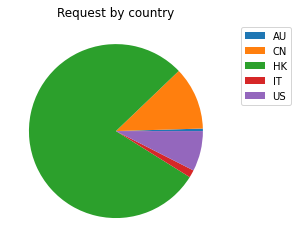

In [423]:
# Create a pie chart of the country values
(unique,counts)=np.unique(country_response, return_counts=True)
frequencies_0= np.asarray((unique,counts))
print(frequencies_0)
plt.pie(frequencies_0[1])
plt.title("Request by country")
plt.legend(labels=frequencies_0[0],loc="upper left",bbox_to_anchor=(1.05,1.0))
plt.show

#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

[['Beijing' 'Ha Kwai Chung' 'Hangzhou' 'Hong Kong'
  'Jinrongjie (Xicheng District)' 'Mountain View' 'New York' 'Quarry Bay'
  'San Francisco (Financial District)' 'Sydney' 'Valcanneto']
 ['15' '166' '1' '2' '9' '1' '14' '1' '1' '1' '3']]


<function matplotlib.pyplot.show(close=None, block=None)>

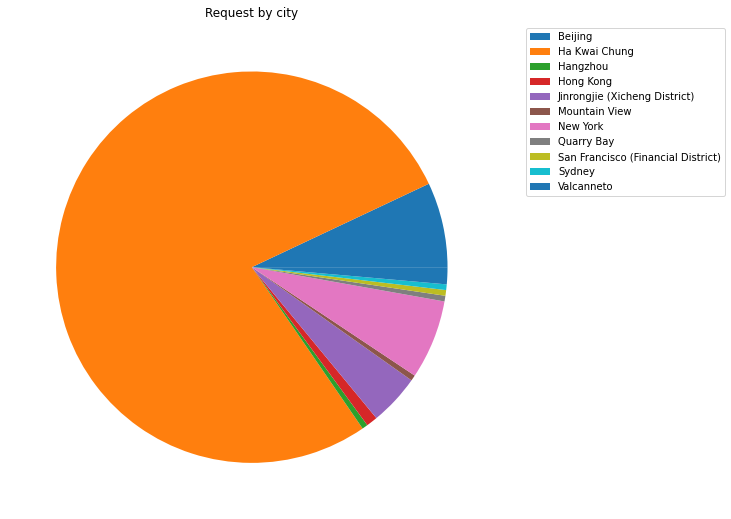

In [424]:
# Create a pie chart of the city values
(unique,counts)=np.unique(city_response, return_counts=True)
frequencies_1= np.asarray((unique,counts))
print(frequencies_1)
fig= plt.figure(figsize=(12,9))
plt.pie(frequencies_1[1])
plt.title("Request by city")
plt.legend(labels=frequencies_1[0],loc="upper left",bbox_to_anchor=(1.05,1.0))
plt.show

In [425]:
#List top 3 country with the numbers of requests
df_freq = pd.DataFrame(frequencies_1.transpose(), columns=["Cities", "Frequencies"])
df_freq["Frequencies"] = pd.to_numeric(df_freq["Frequencies"], errors='coerce')
df_sorted = df_freq.sort_values(by="Frequencies", axis=0, ascending = False).reset_index(drop=True).head(5)
df_sorted.head()

,Cities,Frequencies
0,Ha Kwai Chung,166
1,Beijing,15
2,New York,14
3,Jinrongjie (Xicheng District),9
4,Valcanneto,3


In [426]:
#List top 3 city with the numbers of requests
df_freq1 = pd.DataFrame(frequencies_0.transpose(), columns=["Countries", "Frequencies"])
df_freq1["Frequencies"] = pd.to_numeric(df_freq1["Frequencies"], errors='coerce')
df_sorted1 = df_freq1.sort_values(by="Frequencies", axis=0, ascending = False).reset_index(drop=True).head(5)
df_sorted1.head()

,Countries,Frequencies
0,HK,169
1,CN,25
2,US,16
3,IT,3
4,AU,1


# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [309]:
try: 
    from selenium import webdriver
except: 
    !pip install selenium
    from selenium import webdriver
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument("--headless") # Hides the browser window
chrome_path = 'C:/Users/Manav/Downloads/chromedriver.exe'
driver = webdriver.Chrome(executable_path=chrome_path, options=chrome_options)

2021-04-17 16:52:12 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:52951/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "chrome", "platformName": "any", "goog:chromeOptions": {"extensions": [], "args": []}}}, "desiredCapabilities": {"browserName": "chrome", "version": "", "platform": "ANY", "goog:chromeOptions": {"extensions": [], "args": []}}}
2021-04-17 16:52:12 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): 127.0.0.1:52951
2021-04-17 16:52:12 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "POST /session HTTP/1.1" 200 752
2021-04-17 16:52:12 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request


In [310]:
driver.get("https://www.deakin.edu.au/information-technology/staff-listing")  
    
expand_elems = driver.find_elements_by_css_selector("h3.module__accordion--title")
for elem in expand_elems:
    driver.execute_script("arguments[0].click();", elem)
    

prof_elems = driver.find_elements_by_xpath("//tr/td/a")
prof_data = []
for elem in prof_elems:
    prof_data.append(elem.text)

print(prof_data)

driver.quit()

2021-04-17 16:52:31 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/url {"url": "https://www.deakin.edu.au/information-technology/staff-listing"}
2021-04-17 16:52:37 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "POST /session/e900f46c3286ab47845f8b14a22023ed/url HTTP/1.1" 200 14
2021-04-17 16:52:37 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:37 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/elements {"using": "css selector", "value": "h3.module__accordion--title"}
2021-04-17 16:52:37 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "POST /session/e900f46c3286ab47845f8b14a22023ed/elements HTTP/1.1" 200 959
2021-04-17 16:52:37 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:37 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.

2021-04-17 16:52:38 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/dcb29794-7d14-44b8-a0fe-6f66fcc22379/text {"id": "dcb29794-7d14-44b8-a0fe-6f66fcc22379"}
2021-04-17 16:52:38 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/dcb29794-7d14-44b8-a0fe-6f66fcc22379/text HTTP/1.1" 200 42
2021-04-17 16:52:38 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:38 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/3be68a1c-9fa4-46d1-81e7-d9fd02d35285/text {"id": "3be68a1c-9fa4-46d1-81e7-d9fd02d35285"}
2021-04-17 16:52:38 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/3be68a1c-9fa4-46d1-81e7-d9fd02d35285/text HTTP/1.1" 200 48
2021-04-17 16:52:38 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:38 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/624414af-5cd0-4436-b3a5-68b85b751868/text {"id": "624414af-5cd0-4436-b3a5-68b85b751868"}
2021-04-17 16:52:38 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/624414af-5cd0-4436-b3a5-68b85b751868/text HTTP/1.1" 200 50
2021-04-17 16:52:38 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:38 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/16eada3b-81d8-48c1-a57b-ea3329ca702c/text {"id": "16eada3b-81d8-48c1-a57b-ea3329ca702c"}
2021-04-17 16:52:38 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/16eada3b-81d8-48c1-a57b-ea3329ca702c/text HTTP/1.1" 200 43
2021-04-17 16:52:38 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:38 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/e79f3c4d-4ab1-405a-b292-86fb4b75783a/text {"id": "e79f3c4d-4ab1-405a-b292-86fb4b75783a"}
2021-04-17 16:52:38 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/e79f3c4d-4ab1-405a-b292-86fb4b75783a/text HTTP/1.1" 200 28
2021-04-17 16:52:38 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:38 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/9a35b209-791c-428d-9173-fa4f28e52be7/text {"id": "9a35b209-791c-428d-9173-fa4f28e52be7"}
2021-04-17 16:52:38 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/9a35b209-791c-428d-9173-fa4f28e52be7/text HTTP/1.1" 200 24
2021-04-17 16:52:38 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:39 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/3bbee164-6e4f-402c-85f9-7a92dffb9231/text {"id": "3bbee164-6e4f-402c-85f9-7a92dffb9231"}
2021-04-17 16:52:39 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/3bbee164-6e4f-402c-85f9-7a92dffb9231/text HTTP/1.1" 200 27
2021-04-17 16:52:39 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:39 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/834a99f3-2e4a-41f1-8546-00424d49d3e3/text {"id": "834a99f3-2e4a-41f1-8546-00424d49d3e3"}
2021-04-17 16:52:39 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/834a99f3-2e4a-41f1-8546-00424d49d3e3/text HTTP/1.1" 200 26
2021-04-17 16:52:39 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:39 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/5c9e90ff-09c2-4a90-b8c7-7c6d5e3d5c9c/text {"id": "5c9e90ff-09c2-4a90-b8c7-7c6d5e3d5c9c"}
2021-04-17 16:52:39 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/5c9e90ff-09c2-4a90-b8c7-7c6d5e3d5c9c/text HTTP/1.1" 200 25
2021-04-17 16:52:39 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:39 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/95541375-e77f-4399-b6f7-00c518f00274/text {"id": "95541375-e77f-4399-b6f7-00c518f00274"}
2021-04-17 16:52:39 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/95541375-e77f-4399-b6f7-00c518f00274/text HTTP/1.1" 200 26
2021-04-17 16:52:39 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:39 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/d71e8e21-aa67-454d-a544-9bb8c9d217cb/text {"id": "d71e8e21-aa67-454d-a544-9bb8c9d217cb"}
2021-04-17 16:52:39 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/d71e8e21-aa67-454d-a544-9bb8c9d217cb/text HTTP/1.1" 200 32
2021-04-17 16:52:39 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:39 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/e4e3f7bd-cbd9-4739-92ee-3219710c8126/text {"id": "e4e3f7bd-cbd9-4739-92ee-3219710c8126"}
2021-04-17 16:52:39 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/e4e3f7bd-cbd9-4739-92ee-3219710c8126/text HTTP/1.1" 200 27
2021-04-17 16:52:39 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:40 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/dd172c19-dc43-4333-9727-c88ae5e93bf2/text {"id": "dd172c19-dc43-4333-9727-c88ae5e93bf2"}
2021-04-17 16:52:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/dd172c19-dc43-4333-9727-c88ae5e93bf2/text HTTP/1.1" 200 26
2021-04-17 16:52:40 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:40 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/32684f9c-e5df-403d-8b98-2fae027bcfae/text {"id": "32684f9c-e5df-403d-8b98-2fae027bcfae"}
2021-04-17 16:52:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/32684f9c-e5df-403d-8b98-2fae027bcfae/text HTTP/1.1" 200 23
2021-04-17 16:52:40 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:40 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/4c3ca07d-54b4-4c75-976f-d227e993c2ef/text {"id": "4c3ca07d-54b4-4c75-976f-d227e993c2ef"}
2021-04-17 16:52:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/4c3ca07d-54b4-4c75-976f-d227e993c2ef/text HTTP/1.1" 200 25
2021-04-17 16:52:40 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:40 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/12ca668e-ab8e-40fe-9fcf-c8efaa951dd0/text {"id": "12ca668e-ab8e-40fe-9fcf-c8efaa951dd0"}
2021-04-17 16:52:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/12ca668e-ab8e-40fe-9fcf-c8efaa951dd0/text HTTP/1.1" 200 23
2021-04-17 16:52:40 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:40 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/1d64701e-4894-4f84-aa3d-2f3b4baf9033/text {"id": "1d64701e-4894-4f84-aa3d-2f3b4baf9033"}
2021-04-17 16:52:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/1d64701e-4894-4f84-aa3d-2f3b4baf9033/text HTTP/1.1" 200 25
2021-04-17 16:52:40 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:40 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/e1e08c5b-f9e3-4d08-98dc-a562343824d7/text {"id": "e1e08c5b-f9e3-4d08-98dc-a562343824d7"}
2021-04-17 16:52:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/e1e08c5b-f9e3-4d08-98dc-a562343824d7/text HTTP/1.1" 200 22
2021-04-17 16:52:40 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:41 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/71bed1ea-9e3c-4ccf-900d-249c61919a0c/text {"id": "71bed1ea-9e3c-4ccf-900d-249c61919a0c"}
2021-04-17 16:52:41 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/71bed1ea-9e3c-4ccf-900d-249c61919a0c/text HTTP/1.1" 200 42
2021-04-17 16:52:41 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:41 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/bea07c44-5b9c-4e62-9509-4b326d2cd6be/text {"id": "bea07c44-5b9c-4e62-9509-4b326d2cd6be"}
2021-04-17 16:52:41 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/bea07c44-5b9c-4e62-9509-4b326d2cd6be/text HTTP/1.1" 200 41
2021-04-17 16:52:41 [selenium.webdriver.remote.remote_co

2021-04-17 16:52:41 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/294a728b-ccd7-4753-8376-c611855df50b/text {"id": "294a728b-ccd7-4753-8376-c611855df50b"}
2021-04-17 16:52:41 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/294a728b-ccd7-4753-8376-c611855df50b/text HTTP/1.1" 200 43
2021-04-17 16:52:41 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 16:52:41 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:52951/session/e900f46c3286ab47845f8b14a22023ed/element/ca600ca4-4ab0-458d-8087-aec6d7da87b0/text {"id": "ca600ca4-4ab0-458d-8087-aec6d7da87b0"}
2021-04-17 16:52:41 [urllib3.connectionpool] DEBUG: http://127.0.0.1:52951 "GET /session/e900f46c3286ab47845f8b14a22023ed/element/ca600ca4-4ab0-458d-8087-aec6d7da87b0/text HTTP/1.1" 200 37
2021-04-17 16:52:41 [selenium.webdriver.remote.remote_co

['Emeritus Professor Lynn Batten', 'Emeritus Professor Andrzej Goscinski', 'Professor Jemal Abawajy', 'Professor Maia Angelova', 'Professor Gleb Beliakov', 'Professor Terry Caelli', 'Professor Jinho Choi', 'Professor Chang-Tsun Li', 'Professor Robin Doss', 'Professor Peter Eklund', 'Professor Seng Loke', 'Professor Antonio Robles-Kelly', 'Professor Jean-Guy Schneider', 'Professor Yong Xiang', 'Professor John Yearwood', 'Professor Arkady Zaslavsky', 'Associate Professor Mohamed Abdelrazek', 'Associate Professor Andrew Cain', 'Associate Professor Richard Dazeley', 'Associate Professor Guangyan Huang', 'Associate Professor Gang Li', 'Associate Professor Jianxin Li', 'Associate Professor Xiao Liu', 'Associate Professor Vicky Mak', 'Associate Professor Tim Wilkin', 'Dr Chetan Arora', 'Dr Zubair Baig', 'Dr Shaun Bangay', 'Dr Muneera Bano', 'Dr Jan Carlo Barca', 'Dr Morshed Chowdhury', 'Dr Niroshinie Fernando', 'Dr Longxiang Gao', 'Dr Shang Gao', 'Dr Marek Gagolewski', 'Dr Thuong Hoang', 'Dr 

### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [312]:
# here we first define the parsing method, you will need to use this parsing method to format the professor full name and title from the staff page.
# the name of the professor from staff page will be split by space and last two words are full name 
def parse_name(stringtext):
  return " ".join(stringtext.split(" ")[-2:])," ".join(stringtext.split(" ")[:-2])
prof_filtered = []
allowed_titles = ["Emeritus Professor", "Professor", "Associate Professor"]
for prof in prof_data:
    name, title = parse_name(prof)
    if title in allowed_titles:
        prof_filtered.append({'Name': name, 'Title': title, 'University': 'Deakin University'})
print(prof_filtered)

[{'Name': 'Lynn Batten', 'Title': 'Emeritus Professor', 'University': 'Deakin University'}, {'Name': 'Andrzej Goscinski', 'Title': 'Emeritus Professor', 'University': 'Deakin University'}, {'Name': 'Jemal Abawajy', 'Title': 'Professor', 'University': 'Deakin University'}, {'Name': 'Maia Angelova', 'Title': 'Professor', 'University': 'Deakin University'}, {'Name': 'Gleb Beliakov', 'Title': 'Professor', 'University': 'Deakin University'}, {'Name': 'Terry Caelli', 'Title': 'Professor', 'University': 'Deakin University'}, {'Name': 'Jinho Choi', 'Title': 'Professor', 'University': 'Deakin University'}, {'Name': 'Chang-Tsun Li', 'Title': 'Professor', 'University': 'Deakin University'}, {'Name': 'Robin Doss', 'Title': 'Professor', 'University': 'Deakin University'}, {'Name': 'Peter Eklund', 'Title': 'Professor', 'University': 'Deakin University'}, {'Name': 'Seng Loke', 'Title': 'Professor', 'University': 'Deakin University'}, {'Name': 'Antonio Robles-Kelly', 'Title': 'Professor', 'University'

In [339]:
import pandas as pd
# the crawling information will be stored in pandas dataframe and then save as csv
# below you are required to use the parse_name method to crawl the professor's full name and title
# The column name must be same as the provided professor-list.csv
df_prof = pd.DataFrame(data = prof_filtered)
df_prof.to_csv('C:/Users/Manav/Downloads/Professor-name-list.csv', index = False)
# df_prof.head()
print(df_prof)

                    Name                Title         University
0            Lynn Batten   Emeritus Professor  Deakin University
1      Andrzej Goscinski   Emeritus Professor  Deakin University
2          Jemal Abawajy            Professor  Deakin University
3          Maia Angelova            Professor  Deakin University
4          Gleb Beliakov            Professor  Deakin University
5           Terry Caelli            Professor  Deakin University
6             Jinho Choi            Professor  Deakin University
7          Chang-Tsun Li            Professor  Deakin University
8             Robin Doss            Professor  Deakin University
9           Peter Eklund            Professor  Deakin University
10             Seng Loke            Professor  Deakin University
11  Antonio Robles-Kelly            Professor  Deakin University
12    Jean-Guy Schneider            Professor  Deakin University
13            Yong Xiang            Professor  Deakin University
14         John Yearwood 

## 4. Professor Citation Information Generation


### 4.1 Search the google scholar for all professors 
<div class="alert alert-block alert-warning">

**Code**: 
    Search the google scholar for all professors and obtain their citations-all, h-index-all, i10-all, citation-since2016,h-index-2016 and i10-since2016. Save the results as csv and must having **all the professors name, title and all 6 citation information.**
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.1** Please include your result for this coding task into your report Part II, with proper section title '4.1'.
</div>


*hint: if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na". you could use the while loop with condition or for loop with if condition or for loop with defined method having if condition to deal with those professors do not have google scholar*

In [369]:
# search the google scholar for all professors to obtain their citations_all, h-index_all, i10_all, citation_since2016
# h-index-2016 and i10_since2016. Save the results as csv and must having all the professors name, title and all 6 citation information.
# if the professors did not have the google scholar profle with the name, save the 6 citation information as string "na"
# you are requests to use loops and Conditional Statements to finish this task (eg: while / for, if...), failed to use loop
# and conditional statements will occur 0 mark.
# hint: sometimes, to render the google scholar page, you need to wait for the brower for few seconds, you could use "from time import sleep"
# to have sleep(5) as the wait action for waiting 5 seconds.  
# The column name must be same as the provided professor-citation-information.csv 
# write your code for this part as below:
chrome_options = Options()
chrome_options.add_argument("--headless") # Hides the browser window
chrome_path = 'C:/Users/Manav/Downloads/chromedriver.exe'
driver = webdriver.Chrome(executable_path=chrome_path, options=chrome_options)
prof_data = []
for prof in prof_filtered:
    driver.get("https://scholar.google.com/scholar?q={}+{}".format(prof["Name"].split(" ")[0], prof["Name"].split(" ")[1])) 
    try:
        profile_elem = driver.find_element_by_xpath("//td/h4/a")
        if profile_elem and profile_elem.text != prof["Name"]:
            print("profile_elem.text {}".format(profile_elem.text))
            print("prof name {}".format(prof["Name"]))
            print("Wrong profile")
            raise

        else:
            print(profile_elem.text)
            profile_elem.click()
            html = driver.page_source
            soup = BeautifulSoup(html, 'lxml')

            name = soup.select_one('#gsc_prf_in').text

            cititations_all = soup.select_one('tr:nth-child(1) .gsc_rsb_sc1+ .gsc_rsb_std').text
            cititations_since_2016 = soup.select_one('tr:nth-child(1) .gsc_rsb_std+ .gsc_rsb_std').text

            h_index_all = soup.select_one('tr:nth-child(2) .gsc_rsb_sc1+ .gsc_rsb_std').text
            h_index_since_2016 = soup.select_one('tr:nth-child(2) .gsc_rsb_std+ .gsc_rsb_std').text

            i_10_index_all = soup.select_one('tr~ tr+ tr .gsc_rsb_sc1+ .gsc_rsb_std').text
            i_10_index_since_2016 = soup.select_one('tr~ tr+ tr .gsc_rsb_std+ .gsc_rsb_std').text

            data = {
                "Name": prof["Name"],
                "Title": prof["Title"],
                "citation-all": cititations_all,
                "citation-since2016": cititations_since_2016,
                "h-index-all": h_index_all,
                "h-index-since2016": h_index_since_2016,
                "i10-index-all": i_10_index_all,
                "i10-index-since2016": i_10_index_since_2016,
            }
            prof_data.append(data)
    except Exception as e:
        if type(e).__name__ == "NoSuchElementException":
            print("No profile exists")
        na_data = {
            "Name": prof["Name"],
            "Title": prof["Title"],
            "citation-all": np.nan,
            "citation-since2016": np.nan,
            "h-index-all": np.nan,
            "h-index-since2016": np.nan,
            "i10-index-all": np.nan,
            "i10-index-since2016": np.nan,
        }
        prof_data.append(na_data)
driver.quit()
df_prof_data = pd.DataFrame(prof_data)
df_prof_data.to_csv('C:/Users/Manav/Downloads/Professor-citation-informaton.csv', index = False)

2021-04-17 20:03:11 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "chrome", "platformName": "any", "goog:chromeOptions": {"extensions": [], "args": ["--headless"]}}}, "desiredCapabilities": {"browserName": "chrome", "version": "", "platform": "ANY", "goog:chromeOptions": {"extensions": [], "args": ["--headless"]}}}
2021-04-17 20:03:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): 127.0.0.1:65361
2021-04-17 20:03:11 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session HTTP/1.1" 200 752
2021-04-17 20:03:11 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:11 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Lynn+Batten"}
2021-04-17 20:03:16 [urllib3.connectionpool] DEBUG: http://127.0.

Lynn Batten


2021-04-17 20:03:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/1c12c1a1-ece9-4e9b-b2d1-aed12d03eb24/click HTTP/1.1" 200 14
2021-04-17 20:03:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 148594
2021-04-17 20:03:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:19 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Andrzej+Goscinski"}
2021-04-17 20:03:20 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952

No profile exists


2021-04-17 20:03:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:03:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:21 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:03:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 404 1026
2021-04-17 20:03:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:21 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Maia+Angelova"}


No profile exists


2021-04-17 20:03:22 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:03:22 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:22 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:03:22 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 200 88
2021-04-17 20:03:22 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:22 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element/0f9ca282-9416-4b4d-b7fa-549601afac5c/text {"id": "0f9ca282-9416-4b4d-b7fa-549601afac5c"}
2021-04-17 20:03:22 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81

Maia Angelova


2021-04-17 20:03:25 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/0f9ca282-9416-4b4d-b7fa-549601afac5c/click HTTP/1.1" 200 14
2021-04-17 20:03:25 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:25 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:25 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 177972
2021-04-17 20:03:25 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:25 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Gleb+Beliakov"}
2021-04-17 20:03:26 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc4

Gleb Beliakov


2021-04-17 20:03:28 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/51f70c13-4a47-4b3b-ac73-a08aa4c99f15/click HTTP/1.1" 200 14
2021-04-17 20:03:28 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:28 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:28 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 148368
2021-04-17 20:03:28 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:31 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Terry+Caelli"}
2021-04-17 20:03:31 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41

Terry Caelli


2021-04-17 20:03:33 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/0bde8f50-9160-4531-829e-e4afc8263b32/click HTTP/1.1" 200 14
2021-04-17 20:03:33 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:33 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:33 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 152214
2021-04-17 20:03:33 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:33 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Jinho+Choi"}
2021-04-17 20:03:34 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/

No profile exists


2021-04-17 20:03:35 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:03:35 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:35 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:03:35 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 200 88
2021-04-17 20:03:35 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:35 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element/3c7088de-eb91-4791-9080-da79ea7bfceb/text {"id": "3c7088de-eb91-4791-9080-da79ea7bfceb"}
2021-04-17 20:03:35 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81

Chang-Tsun Li


2021-04-17 20:03:37 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/3c7088de-eb91-4791-9080-da79ea7bfceb/click HTTP/1.1" 200 14
2021-04-17 20:03:37 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:37 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:37 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 176377
2021-04-17 20:03:37 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:37 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Robin+Doss"}
2021-04-17 20:03:37 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/

No profile exists


2021-04-17 20:03:38 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:03:38 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:38 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:03:38 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 404 1026
2021-04-17 20:03:38 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:38 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Seng+Loke"}


No profile exists


2021-04-17 20:03:39 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:03:39 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:39 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:03:39 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 200 88
2021-04-17 20:03:39 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:39 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element/2072350a-f217-4998-9826-a2e7ea8fe0ae/text {"id": "2072350a-f217-4998-9826-a2e7ea8fe0ae"}
2021-04-17 20:03:39 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81

profile_elem.text Seng W. Loke
prof name Seng Loke
Wrong profile


2021-04-17 20:03:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:03:40 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:40 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:03:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 200 88
2021-04-17 20:03:40 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:40 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element/962effd2-997b-42cf-aea4-bf0d35eb18e4/text {"id": "962effd2-997b-42cf-aea4-bf0d35eb18e4"}
2021-04-17 20:03:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81

Antonio Robles-Kelly


2021-04-17 20:03:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/962effd2-997b-42cf-aea4-bf0d35eb18e4/click HTTP/1.1" 200 14
2021-04-17 20:03:40 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:40 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:40 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 149944
2021-04-17 20:03:40 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:40 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Jean-Guy+Schneider"}
2021-04-17 20:03:42 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e60122695

Jean-Guy Schneider


2021-04-17 20:03:44 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/9bc12d8e-406d-4425-be4e-d8cbff2f69e0/click HTTP/1.1" 200 14
2021-04-17 20:03:44 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:44 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:44 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 176780
2021-04-17 20:03:44 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:44 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Yong+Xiang"}
2021-04-17 20:03:45 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/

Yong Xiang


2021-04-17 20:03:47 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/fb5d891d-7cf5-4df6-8498-8faeb28fdda3/click HTTP/1.1" 200 14
2021-04-17 20:03:47 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:47 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:47 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 170265
2021-04-17 20:03:47 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:47 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=John+Yearwood"}
2021-04-17 20:03:51 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc4

John Yearwood


2021-04-17 20:03:52 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/cbdc6387-8e89-4c66-a7f1-f2c693aa47a9/click HTTP/1.1" 200 14
2021-04-17 20:03:52 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:52 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:52 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 162345
2021-04-17 20:03:52 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:52 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Arkady+Zaslavsky"}
2021-04-17 20:03:53 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952b

Arkady Zaslavsky


2021-04-17 20:03:54 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/a48d20cd-c96c-4804-bc3d-764c63465d32/click HTTP/1.1" 200 14
2021-04-17 20:03:54 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:54 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:54 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 159891
2021-04-17 20:03:54 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:54 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Mohamed+Abdelrazek"}
2021-04-17 20:03:55 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e60122695

No profile exists


2021-04-17 20:03:56 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:03:56 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:56 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:03:56 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 200 88
2021-04-17 20:03:56 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:56 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element/e3a307f1-2caf-4764-9859-f04740e3055f/text {"id": "e3a307f1-2caf-4764-9859-f04740e3055f"}
2021-04-17 20:03:56 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81

Andrew Cain


2021-04-17 20:03:57 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/e3a307f1-2caf-4764-9859-f04740e3055f/click HTTP/1.1" 200 14
2021-04-17 20:03:57 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:57 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:03:57 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 147065
2021-04-17 20:03:57 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:03:58 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Richard+Dazeley"}
2021-04-17 20:03:58 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bc

Richard Dazeley


2021-04-17 20:04:00 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/8a8386ba-0f74-476f-be8d-52d8b1ed48ba/click HTTP/1.1" 200 14
2021-04-17 20:04:00 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:00 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:04:00 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 171527
2021-04-17 20:04:00 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:00 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Guangyan+Huang"}
2021-04-17 20:04:01 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc

Guangyan Huang


2021-04-17 20:04:03 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/91aaa55f-ed2e-40b9-a2d2-4121f5fac6d9/click HTTP/1.1" 200 14
2021-04-17 20:04:03 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:03 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:04:03 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 148238
2021-04-17 20:04:03 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:03 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Gang+Li"}
2021-04-17 20:04:03 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url

Gang Li


2021-04-17 20:04:04 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/c30514b4-25d3-4882-b67e-2256085ef263/click HTTP/1.1" 200 14
2021-04-17 20:04:04 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:04 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:04:04 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 175784
2021-04-17 20:04:04 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:04 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Jianxin+Li"}
2021-04-17 20:04:05 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/

No profile exists


2021-04-17 20:04:06 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:04:06 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:06 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:04:06 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 200 88
2021-04-17 20:04:06 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:06 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element/0841853f-94dd-4c54-b395-615f54993890/text {"id": "0841853f-94dd-4c54-b395-615f54993890"}
2021-04-17 20:04:06 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81

profile_elem.text Xiao Liu (刘晓)
prof name Xiao Liu
Wrong profile


2021-04-17 20:04:07 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:04:07 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:07 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:04:07 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 200 88
2021-04-17 20:04:07 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:07 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element/76fe7c4c-538b-4099-a3f2-06f4bab251e5/text {"id": "76fe7c4c-538b-4099-a3f2-06f4bab251e5"}
2021-04-17 20:04:07 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81

profile_elem.text Vicky Mak-Hau
prof name Vicky Mak
Wrong profile


2021-04-17 20:04:09 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/url HTTP/1.1" 200 14
2021-04-17 20:04:09 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:09 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element {"using": "xpath", "value": "//td/h4/a"}
2021-04-17 20:04:09 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element HTTP/1.1" 200 88
2021-04-17 20:04:09 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:09 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/element/cf0f638f-405b-4ae5-bb44-257e02741b55/text {"id": "cf0f638f-405b-4ae5-bb44-257e02741b55"}
2021-04-17 20:04:09 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81

Tim Wilkin


2021-04-17 20:04:10 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc41b/element/cf0f638f-405b-4ae5-bb44-257e02741b55/click HTTP/1.1" 200 14
2021-04-17 20:04:10 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:10 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/source {}
2021-04-17 20:04:10 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "GET /session/708a9efb81d153b3e601226952bcc41b/source HTTP/1.1" 200 148007
2021-04-17 20:04:10 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2021-04-17 20:04:10 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:65361/session/708a9efb81d153b3e601226952bcc41b/url {"url": "https://scholar.google.com/scholar?q=Abbas+Kudrati"}
2021-04-17 20:04:11 [urllib3.connectionpool] DEBUG: http://127.0.0.1:65361 "POST /session/708a9efb81d153b3e601226952bcc4

No profile exists


In [385]:
df_prof_data.head()

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
0,Lynn Batten,Emeritus Professor,21,1172,23,16,45,21
3,Maia Angelova,Professor,14,399,15,11,21,14
4,Gleb Beliakov,Professor,86,4632,42,32,135,86
5,Terry Caelli,Professor,36,1477,51,20,177,36
7,Chang-Tsun Li,Professor,65,2339,33,21,104,65


### 4.2 Find out the professor name having the most citations 

<div class="alert alert-block alert-warning">

**Code**: 
    Find out the professor name having the most citations (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.2** Please include your result for this coding task into your report Part II, with proper section title '4.2'.
</div>


In [428]:
# find out the professor name having the most citations (please remove those professor who does not have google scholar page)
# write your code here
df_new_prof = df_prof_data
df_new_prof.dropna(inplace=True)
df_new_prof["citation-all"] = pd.to_numeric(df_new_prof["citation-all"], errors='coerce')
df_citation = df_new_prof.sort_values(by="citation-all", ascending=False)
df_citation.head(1)

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
20,Gang Li,Associate Professor,130,30632,75,60,144,130


### 4.3 Find out the row for associate professor having the most i10-index since 2016 
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.3** Please include your result for this coding task into your report Part II, with proper section title '4.3'.
</div>


In [382]:
# find out the row for associate professor having the most i10_index since 2016 (please remove those professor who does not have google scholar page)
# write your code here
df_new_prof["i10-index-since2016"] = pd.to_numeric(df_new_prof["i10-index-since2016"], errors='coerce')
df_asc_prof = df_new_prof[df_new_prof["Title"] == "Associate Professor"]
df_asc_prof_sorted = df_asc_prof.sort_values(by="i10-index-since2016", ascending=False)
df_asc_prof_sorted.head(1)

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
20,Gang Li,Associate Professor,130,30632,75,60,144,130


### 4.4 Find out all the professors name who has the citations_since2016 > 2500
<div class="alert alert-block alert-warning">

**Code**: 
    Find out the row for associate professor having the most i10-index since 2016 (please remove those professor who does not have google scholar page)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 4.4** Please include your result for this coding task into your report Part II, with proper section title '4.4'.
</div>


In [389]:
# find out all the professors name who has the citations_since2016 > 2500
# write your code here
df_new_prof["citation-since2016"] = pd.to_numeric(df_new_prof["citation-since2016"], errors='coerce')
df_cit_2016 = df_new_prof.sort_values(by="citation-since2016", ascending=False)
df_cit_2016 = df_cit_2016[df_cit_2016["citation-since2016"] > 2500]
df_cit_2016.head()

,Name,Title,citation-all,citation-since2016,h-index-all,h-index-since2016,i10-index-all,i10-index-since2016
20,Gang Li,Associate Professor,130,30632,75,60,144,130
15,Arkady Zaslavsky,Professor,80,8339,50,33,177,80
13,Yong Xiang,Professor,95,4971,40,35,118,95
4,Gleb Beliakov,Professor,86,4632,42,32,135,86
